In [1]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import community
from collections import Counter

%matplotlib inline

In [2]:
G_user = nx.read_edgelist('../data/user_edges.tsv', delimiter='\t')
G_business = nx.read_edgelist('../data/business_edges.tsv', delimiter='\t')

In [3]:
def girvan_newman_step(G):
    '''
    INPUT: Graph G
    OUTPUT: None
    Run one step of the Girvan-Newman community detection algorithm.
    Afterwards, the graph will have one more connected component.
    '''
    init_ncomp = nx.number_connected_components(G)
    ncomp = init_ncomp
    while ncomp == init_ncomp:
        bw = Counter(nx.edge_betweenness_centrality(G))
        a, b = bw.most_common(1)[0][0]
        G.remove_edge(a, b)
        ncomp = nx.number_connected_components(G)


def find_communities_n(G, n):
    '''
    INPUT: Graph G, int n
    OUTPUT: list of lists
    Run the Girvan-Newman algorithm on G for n steps. Return the resulting
    communities.
    '''
    G1 = G.copy()
    for i in xrange(n):
        girvan_newman_step(G1)
    return list(nx.connected_components(G1))


def find_communities_modularity(G, max_iter=None):
    '''
    INPUT:
        G: networkx Graph
        max_iter: (optional) if given, maximum number of iterations
    OUTPUT: list of lists of strings (node names)
    Run the Girvan-Newman algorithm on G and find the communities with the
    maximum modularity.
    '''
    degrees = G.degree()
    num_edges = G.number_of_edges()
    G1 = G.copy()
    best_modularity = -1.0
    best_comps = nx.connected_components(G1)
    i = 0
    while G1.number_of_edges() > 0:
        subgraphs = nx.connected_component_subgraphs(G1)
        modularity = get_modularity(subgraphs, degrees, num_edges)
        if modularity > best_modularity:
            best_modularity = modularity
            best_comps = list(nx.connected_components(G1))
        girvan_newman_step(G1)
        i += 1
        if max_iter and i >= max_iter:
            break
    return best_comps


def get_modularity(subgraphs, degrees, num_edges):
    '''
    INPUT:
        subgraphs: graph broken in subgraphs
        degrees: dictionary of degree values of original graph
        num_edges: float, number of edges in original graph
    OUTPUT: Float (modularity value, between -0.5 and 1)
    Return the value of the modularity for the graph G.
    '''
    mod = 0
    for g in subgraphs:
        for node1 in g:
            for node2 in g:
                mod += int(g.has_edge(node1, node2))
                mod -= degrees[node1] * degrees[node2] / (2. * num_edges)
    return mod / (2. * num_edges)


In [ ]:
# if __name__ == '__main__':
c = find_communities_modularity(G_business)
print "Optimal number of communities: %d" % len(c)

In [101]:
#Quick snapshot of the Network
print nx.info(G_business)

Name: 
Type: Graph
Number of nodes: 802
Number of edges: 263559
Average degree: 657.2544


In [84]:
#Quick snapshot of the Network
print nx.info(G_business)

Name: 
Type: Graph
Number of nodes: 795
Number of edges: 211843
Average degree: 532.9384


In [19]:
#Create network layout for visualizations
spring_pos = nx.spring_layout(nx.complete_graph(5))

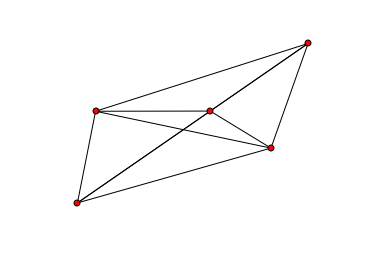

In [20]:
plt.axis("off")
nx.draw_networkx(nx.complete_graph(5), pos = spring_pos, with_labels = False, node_size = 35)

(array([ 480.,  148.,   55.,    0.,   41.,   32.,    0.,   16.,   18.,
           0.,    2.,    6.,    2.,    0.,    0.,    1.,    0.,    0.,
           0.,    1.]),
 array([  0. ,   0.7,   1.4,   2.1,   2.8,   3.5,   4.2,   4.9,   5.6,
          6.3,   7. ,   7.7,   8.4,   9.1,   9.8,  10.5,  11.2,  11.9,
         12.6,  13.3,  14. ]),
 <a list of 20 Patch objects>)

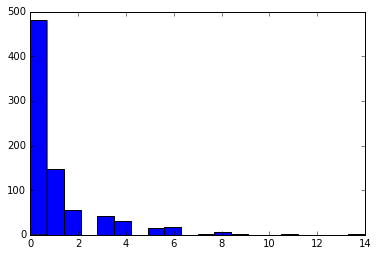

In [111]:
plt.hist(nx.degree_histogram(G_business), bins=20)

In [119]:
nx.degree(G_business)

{u'1300-on-fillmore-san-francisco': 750,
 u'15-romolo-san-francisco': 775,
 u'4505-burgers-and-bbq-san-francisco': 733,
 u'54-mint-ristorante-italiano-san-francisco-2': 720,
 u'5a5-steak-lounge-san-francisco-4': 754,
 u'7-mile-house-brisbane': 376,
 u'a-la-turca-restaurant-san-francisco': 724,
 u'a16-san-francisco-4': 737,
 u'acquerello-san-francisco': 727,
 u'akikos-restaurant-san-francisco': 743,
 u'albona-ristorante-istriano-san-francisco': 655,
 u'alegrias-san-francisco': 462,
 u'alexanders-steakhouse-san-francisco': 751,
 u'aliotos-restaurant-san-francisco': 431,
 u'amami-sushi-san-bruno-3': 608,
 u'amber-india-san-francisco-2': 763,
 u'ame-san-francisco': 732,
 u'americano-san-francisco': 769,
 u'amicis-east-coast-pizzeria-san-francisco-2': 615,
 u'anchor-and-hope-san-francisco': 761,
 u'anchor-oyster-bar-san-francisco': 713,
 u'angel-fish-japanese-restaurant-alameda': 619,
 u'angelines-louisiana-kitchen-berkeley': 773,
 u'aq-restaurant-and-bar-san-francisco': 709,
 u'arabian-nig

In [17]:
parts = community.best_partition(G_user)
values = [parts.get(node) for node in G_user.nodes()]

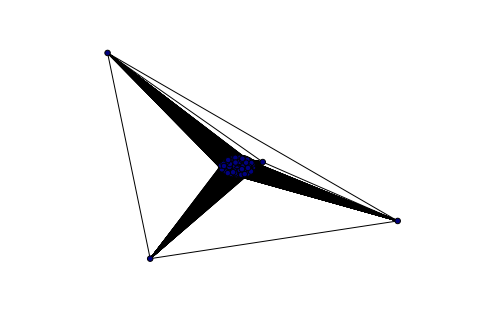

In [18]:
nx.draw_spring(G_user, cmap = plt.get_cmap('jet'), node_color = values, node_size=30, with_labels=False)

In [6]:
mod = community.modularity(parts,G_business)
print("modularity:", mod)

('modularity:', 0.02918204008576606)


In [25]:
Counter(G_business.degree()).most_common(5)

[(u'state-bird-provisions-san-francisco', 800),
 (u'wayfare-tavern-san-francisco-2', 799),
 (u'katana-ya-san-francisco', 797),
 (u'san-tung-chinese-restaurant-san-francisco', 796),
 (u'gary-danko-san-francisco', 796)]

In [26]:
Counter(nx.betweenness_centrality(G_business)).most_common(5)

[(u'state-bird-provisions-san-francisco', 0.000618294017259993),
 (u'wayfare-tavern-san-francisco-2', 0.0006121417844902849),
 (u'san-tung-chinese-restaurant-san-francisco', 0.0006015141563085943),
 (u'katana-ya-san-francisco', 0.0005952199476071866),
 (u'ikes-place-san-francisco', 0.0005547874086438683)]

In [27]:
Counter(nx.eigenvector_centrality(G_business)).most_common(5)

NameError: name 'smallG' is not defined

In [ ]:
a=[(u'state-bird-provisions-san-francisco', 0.000618294017259993),
 (u'wayfare-tavern-san-francisco-2', 0.0006121417844902849),
 (u'san-tung-chinese-restaurant-san-francisco', 0.0006015141563085943),
 (u'katana-ya-san-francisco', 0.0005952199476071866),
 (u'ikes-place-san-francisco', 0.0005547874086438683)]